In [1]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

res = requests.get(
    'https://api.worldtradingdata.com/api/v1/history?symbol=SPY&sort=newest&api_token=1PuMQqtLgDksslLmJMFOmxhpkybV4otV3zjyCkFyw7Oy6z1MhbFZwE0G1dKY',)

data = res.json()

dates = data['history'].items()
day_deltas_raw = {}
day_deltas_pct = {}
day_ranges_raw = {}
day_ranges_pct = {}
day_volumes = {}

for k, v in dates:
    date_metrics = dict(v.items())
    day_open = float(date_metrics['open'])
    day_close = float(date_metrics['close'])
    day_high = float(date_metrics['high'])
    day_low = float(date_metrics['low'])
    day_volume = int(date_metrics['volume'])

    day_delta_raw = day_close - day_open
    day_delta_pct = day_delta_raw / day_open * 100
    day_range_raw = day_high - day_low
    day_range_pct = day_range_raw / day_open * 100

    day_deltas_raw[k] = day_delta_raw
    day_deltas_pct[k] = day_delta_pct
    day_ranges_raw[k] = day_range_raw
    day_ranges_pct[k] = day_range_pct
    day_volumes[k] = day_volume

df_day_deltas_raw = pd.DataFrame(day_deltas_raw.items(), columns=['date', 'delta_raw'])
df_day_deltas_pct = pd.DataFrame(day_deltas_pct.items(), columns=['date', 'delta_pct'])
df_day_ranges_raw = pd.DataFrame(day_ranges_raw.items(), columns=['date', 'range_raw'])
df_day_ranges_pct = pd.DataFrame(day_ranges_raw.items(), columns=['date', 'range_raw'])
df_day_volumes = pd.DataFrame(day_volumes.items(), columns=['date', 'volume'])

In [2]:
print(df_day_deltas_raw.head(3))
print(df_day_deltas_pct.head(3))
print(df_day_ranges_raw.head(3))
print(df_day_ranges_pct.head(3))
print(df_day_volumes.head(3))

         date  delta_raw
0  2020-01-03       1.25
1  2020-01-02       1.33
2  2019-12-31       1.33
         date  delta_pct
0  2020-01-03   0.389214
1  2020-01-02   0.411077
2  2019-12-31   0.414938
         date  range_raw
0  2020-01-03       2.54
1  2020-01-02       2.36
2  2019-12-31       1.98
         date  range_raw
0  2020-01-03       2.54
1  2020-01-02       2.36
2  2019-12-31       1.98
         date    volume
0  2020-01-03  63788210
1  2020-01-02  59253833
2  2019-12-31  57106998


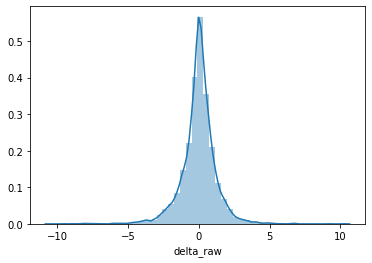

In [6]:
df_day_deltas_raw.describe()
sns.distplot(df_day_deltas_raw['delta_raw'])

In [7]:
df_day_deltas_raw.describe()

,delta_raw
count,6756.000000
mean,0.000410
std,1.245137
min,-10.380000
25%,-0.500000
50%,0.050000
75%,0.590000
max,10.210000
